In [1]:
import scipy
import pandas_datareader
from sklearn.svm import SVC
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from pandas_datareader import data as pdr
import alpha_vantage as av
from alpha_vantage.timeseries import TimeSeries

In [2]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='L8F3VYHBAHQXS6Y1')
serie, meta_data = ts.get_intraday('GOOGL')

In [3]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='L8F3VYHBAHQXS6Y1')
serie2, meta_data = ts.get_intraday('AMZN')


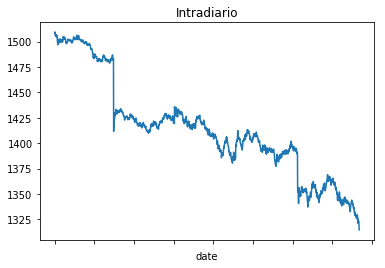

In [4]:
ts = TimeSeries(key='L8F3VYHBAHQXS6Y1', output_format='pandas')
serie, meta_data = ts.get_intraday(symbol='GOOGL',interval='1min', outputsize='full')
serie['4. close'].plot()
plt.title('Intradiario')
plt.show()

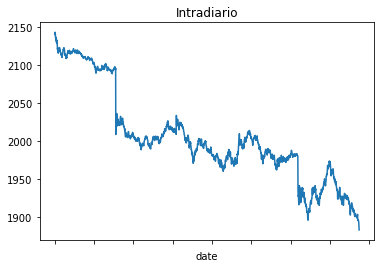

In [5]:
ts = TimeSeries(key='L8F3VYHBAHQXS6Y1', output_format='pandas')
serie2, meta_data = ts.get_intraday(symbol='AMZN',interval='1min', outputsize='full')
serie2['4. close'].plot()
plt.title('Intradiario')
plt.show()

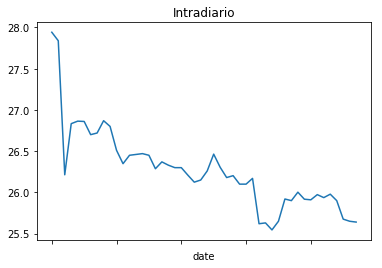

In [6]:
ts = TimeSeries(key='L8F3VYHBAHQXS6Y1', output_format='pandas')
serie2, meta_data = ts.get_intraday(symbol='DAX',interval='1min', outputsize='full')
serie2['4. close'].plot()
plt.title('Intradiario')
plt.show()

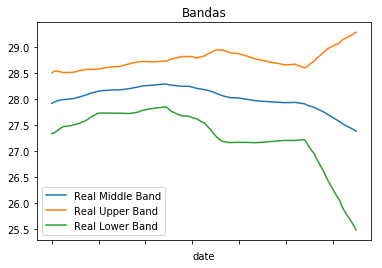

In [25]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key='L8F3VYHBAHQXS6Y1', output_format='pandas')
data, meta_data = ti.get_bbands(symbol='DAX', interval='60min', time_period=60)
data.plot()
plt.title('Bandas')
plt.show()


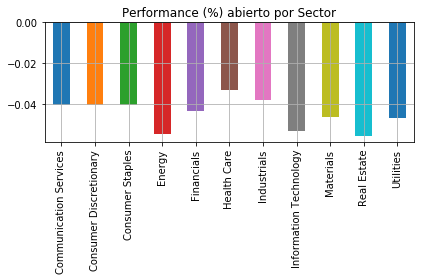

In [26]:
sp = SectorPerformances(key='L8F3VYHBAHQXS6Y1', output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Performance (%) abierto por Sector')
plt.tight_layout()
plt.grid()
plt.show()

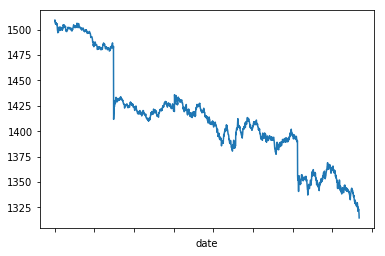

In [9]:
serie['4. close'].plot()


In [10]:
y = np.where(serie['4. close'].shift(-1) > serie['4. close'],1,-1)


In [11]:
serie['Open-Close'] = serie['1. open'] - serie['4. close']
serie['High-Low'] = serie['2. high'] - serie['3. low']
 
x=serie[['Open-Close','High-Low']]

In [12]:
serie.head(1)


,1. open,2. high,3. low,4. close,5. volume,Open-Close,High-Low
date,,,,,,,
2020-02-21 09:31:00,1504.58,1509.7338,1504.58,1509.17,111391.0,-4.59,5.1538


In [35]:
split_percentage = 0.8
split = int(split_percentage*len(serie))
 
train_x = x[:split]
train_y = y[:split]
 
test_x = x[split:]
test_y = y[split:]


In [36]:
cls = SVC().fit(train_x, train_y)


/Users/susanamenendez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
accuracy_train = accuracy_score(train_y, cls.predict(train_x))
 
accuracy_test = accuracy_score(test_y, cls.predict(test_x))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 56.18%
Test Accuracy: 53.12%


In [38]:
serie['Predicted_Signal'] = cls.predict(x)


In [39]:
serie['Return'] = np.log(serie['4. close'].shift(-1) / serie['4. close'])*100


In [40]:
serie['Strategy_Return'] = serie['Return'] * serie['Predicted_Signal']


In [41]:
data.head()

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
Communication Services,-0.0405,-0.0021,-0.0772,-0.0552,0.0054,-0.0196,0.1533,0.0316,0.1287,0.7386
Consumer Discretionary,-0.0407,-0.0069,-0.0823,-0.0290,0.0099,-0.0246,0.1045,0.3913,0.5907,3.0142
Consumer Staples,-0.0407,-0.0049,-0.0429,-0.0303,0.0072,-0.0206,0.1355,0.1163,0.2395,1.2656
Energy,-0.0547,-0.0297,-0.1283,-0.1647,-0.1821,-0.2136,-0.2586,-0.3051,-0.3918,-0.1405
Financials,-0.0437,-0.0067,-0.0822,-0.0615,-0.0516,-0.0751,0.0751,0.1672,0.4341,1.4129


In [43]:
from sklearn.neighbors import KNeighborsClassifier


In [44]:
from sklearn.metrics import accuracy_score


In [45]:
knn = KNeighborsClassifier(n_neighbors=15)


In [46]:
knn.fit(train_x, train_y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [47]:
accuracy_train = accuracy_score(train_y, knn.predict(train_x))


In [48]:
accuracy_test = accuracy_score(test_y, knn.predict(test_x))


In [49]:
print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.63
Test_data Accuracy: 0.51


In [50]:
serie['Predicted_Signal_knn'] = knn.predict(x)


In [51]:
#SPY 
serie['SPY Returns'] = np.log(serie['4. close'] / serie['4. close'].shift(1))
Cumulative_SPY_Returns = serie[split:]['SPY Returns'].cumsum()*100

In [52]:
serie['Strategy_Returns'] = serie['SPY Returns'] * serie['Predicted_Signal_knn'].shift(1)


In [53]:
Cum_Strategy_Returns = serie[split:]['Strategy_Returns'].cumsum()*100


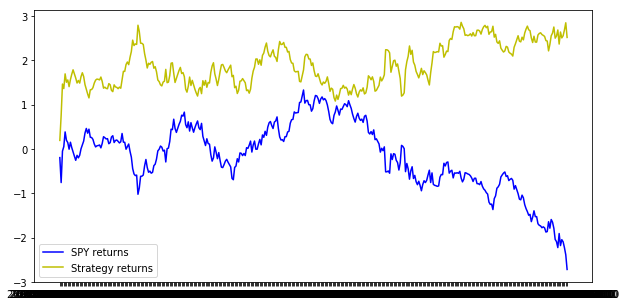

In [54]:
plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_Returns, color='b',label = 'SPY returns')
plt.plot(Cum_Strategy_Returns, color='y',label = 'Strategy returns')
plt.legend()
plt.show()

In [55]:
Std = Cum_Strategy_Returns.std()
Sharpe = (Cum_Strategy_Returns - Cumulative_SPY_Returns)/Std
Sharpe=Sharpe.mean()
print('Sharpe ratio: %.2f' %Sharpe)

Sharpe ratio: 4.27
